In [2]:
import pandas as pd
from collections import Counter
import numpy as np
from Bio import SeqIO
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import sys
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage,leaves_list
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import hamming, squareform
from scipy.spatial.distance import pdist, jaccard

PROJECT_FILEPATH='/home/groups/dpwall/briannac/blood_microbiome/'

PROJECT_FILEPATH='/home/groups/dpwall/briannac/blood_microbiome/results/unmapped_read_distribution'
sys.path.append('/home/groups/dpwall/briannac/blood_microbiome/src')

HOME_FILEPATH='/home/groups/dpwall/briannac'
OAK_FILEPATH='/oak/stanford/groups/dpwall/users/briannac'


bacteria_aggregated_strain_file = PROJECT_FILEPATH + 'data/bacteria_strain_agg.csv'
bacteria_aggregated_species_file =  PROJECT_FILEPATH + 'data/bacteria_species_agg.csv'

# Output files and symlinks.
bacteria_file_out = PROJECT_FILEPATH + 'data/bacteria_filt.csv'
virus_file_out = PROJECT_FILEPATH + 'data/virus_filt.csv'
virus_out_file = '/home/groups/dpwall/briannac/blood_microbiome/results_final/virus_filt.csv'
hmp_catalog_file = '/home/groups/dpwall/briannac/blood_microbiome/data/hmp_project_catalog.csv'


In [12]:
viruses = pd.read_csv('/scratch/users/briannac/blood_microbiome/make_microbe_mats/virus.all.csv', index_col=0)
viruses = viruses[viruses.columns[viruses.sum()>0]]

bacteria = pd.read_csv('/scratch/users/briannac/blood_microbiome/make_microbe_mats/bacteria.all.csv', index_col=0)
bacteria = bacteria[bacteria.columns[bacteria.sum()>0]]

In [35]:
import csv
with open('/scratch/users/briannac/blood_microbiome/make_microbe_mats/bacteria.all.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
non_zeros = [sum([int(d[i]) for d in data[1:]])>0 for i in range(1,len(data[1]))]
idx_to_keep = np.where(np.array(non_zeros))[0]
new_data = [[int(d[i+1]) for i in idx_to_keep] for d in data[1:]]

col_names = np.array(data[0][1:])
row_names = [d[0] for d in data[1:]]

bacteria = pd.DataFrame(new_data)
bacteria.columns = col_names[idx_to_keep]
bacteria.index = row_names

In [73]:
non_zeros = [sum([int(d[i]) for d in data[1:]])>0 for i in range(1,len(data[1]))]
idx_to_keep = np.where(np.array(non_zeros))[0]
new_data = [[int(d[i+1]) for i in idx_to_keep] for d in data[1:]]

col_names = np.array(data[0][1:])
row_names = [d[0] for d in data[1:]]

bacteria = pd.DataFrame(new_data)
bacteria.columns = col_names[idx_to_keep]
bacteria.index = row_names

In [106]:
idx_to_keep = np.where(np.array(non_zeros))[0]
new_data = [[int(d[i+1]) for i in idx_to_keep] for d in data[1:]]

In [107]:
col_names = np.array(data[0][1:])
row_names = [d[0] for d in data[1:]]

In [108]:
bacteria = pd.DataFrame(new_data)
bacteria.columns = col_names[idx_to_keep]
bacteria.index = row_names

In [109]:
df.columns = col_names[idx_to_keep]
df.index = row_names

In [40]:
bacteria = pd.DataFrame(data, header=None, skiprows=1)

TypeError: __init__() got an unexpected keyword argument 'header'

In [41]:
bacteria = pd.read_csv('/scratch/users/briannac/blood_microbiome/make_microbe_mats/bacteria.all.csv', index_col=0, skiprows=1, header=None)
#bacteria = bacteria[bacteria.columns[bacteria.sum()>0]]

KeyboardInterrupt: 

In [33]:
bacteria

NameError: name 'bacteria' is not defined

In [29]:
np.median(bacteria['poorly_aligned'].sum()/bacteria.sum(axis=1).sum())

0.13436510139317454

In [53]:
viruses = pd.read_csv('/scratch/users/briannac/blood_microbiome/make_microbe_mats/virus.all.csv', index_col=0)

,sample,VIRL|gi|307691262|ref|NC_014542.1|,VIRL|gi|261420948|ref|NC_013413.1|,VIRL|gi|226232349|ref|NC_012493.1|,VIRL|gi|226202299|ref|NC_012492.1|,VIRL|gi|195535989|ref|NC_011096.1|,VIRL|gi|45445708|ref|NC_005812.1|,VIRL|gi|45445705|ref|NC_005811.1|,VIRL|gi|188572155|ref|NC_010714.1|,VIRL|gi|188572148|ref|NC_010713.1|,...,NC_012802.1,NC_012776.1,NC_012777.1,NC_012729.2,NC_012564.1,NC_012042.1,NC_011800.1,NC_011203.1,NC_007605.1,NC_001664.4


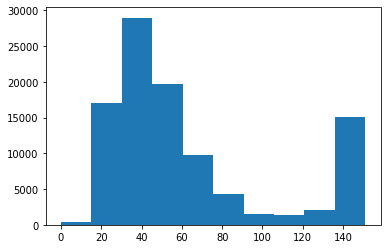

In [46]:
AS_df = pd.read_csv('test_AS.csv', header=None)
ref_df = pd.read_csv('test_ref.csv', header=None)
plt.hist(AS_df[0].values)
plt.show()

In [49]:
Counter(ref_df[0])

Counter({'MH533023.1': 186,
         'MH533024.1': 639,
         'MH533028.1': 5949,
         'MH533029.1': 316,
         'MH533030.1': 161,
         'MH533031.1': 1203,
         'MH533034.1': 116,
         'MH533035.1': 214,
         'MH533036.1': 563,
         'MH533037.1': 1143,
         'MH533038.1': 787,
         'MH533039.1': 1248,
         'MH533040.1': 1322,
         'MH533041.1': 212,
         'MH533042.1': 682,
         'MH533045.1': 3,
         'MH533047.1': 669,
         'MH533048.1': 1,
         'MH533049.1': 4,
         'MH533051.1': 244,
         'MH533052.1': 12,
         'MH533053.1': 1537,
         'MH533055.1': 393,
         'MH533056.1': 586,
         'MH533057.1': 675,
         'MH533058.1': 59,
         'MH533059.1': 1253,
         'MH533060.1': 3159,
         'MH533061.1': 16,
         'MH533065.1': 155,
         'MH533068.1': 86,
         'MH533069.1': 74,
         'MH533071.1': 2,
         'MH533073.1': 4,
         'MH533074.1': 2213,
         'MH533075.1': 115

In [11]:
hmp_catalog_file = '/home/groups/dpwall/briannac/blood_microbiome/data/hmp_project_catalog.csv'


In [10]:
bacteria_abundance = pd.read_csv(bacteria_abundance_no_filter_file, 
                                 index_col=0).drop('batch', axis=1)
bacteria_abundance_filtered = pd.read_csv(bacteria_abundance_filtered_file, 
                                          index_col=0).drop('batch', axis=1)
virus_abundance = pd.read_csv(virus_abundance_no_filter_file,
                              index_col=0).drop('batch', axis=1)
virus_abundance_filtered = pd.read_csv(virus_abundance_filtered_file,
                                       index_col=0).drop('batch', axis=1)
bacteria_aggregated_strain = pd.read_csv(bacteria_aggregated_strain_file,
                                       index_col=0).drop(['batch', 'type'], axis=1)

In [12]:
# Where did they come from
hmp_catalog = pd.read_csv(hmp_catalog_file)

In [2]:
bacteria_aggregated_strain = pd.read_csv(bacteria_aggregated_strain_file,
                                       index_col=0).drop(['batch', 'type'], axis=1)
bacteria_aggregated_species = pd.read_csv(bacteria_aggregated_species_file,
                                       index_col=0).drop(['batch', 'type'], axis=1)

In [ ]:
print('shapes')
print(np.shape(bacteria_abundance), 'bacteria')
print(np.shape(bacteria_abundance_filtered), 'bacteria MAPQ filtered')
print(np.shape(virus_abundance), 'virus')
print(np.shape(virus_abundance_filtered), 'virus MAPQ filtered')

In [5]:
print('num reads - median')
print(np.median(virus_abundance.sum(axis=1)), 'virus')
print(np.median(virus_abundance_filtered.sum(axis=1)), 'virus MAPQ filtered')
print(np.median(bacteria_abundance.sum(axis=1)), 'bacteria')
print(np.median(bacteria_abundance_filtered.sum(axis=1)), 'bacteria MAPQ filtered')


num reads - median
1365000.5 virus
1364804.0 virus MAPQ filtered
36500.5 bacteria
26881.0 bacteria MAPQ filtered


In [6]:
print('num reads total')
print(virus_abundance.sum().sum(), 'virus')
print(virus_abundance_filtered.sum().sum(), 'virus MAPQ filtered')
print(bacteria_abundance.sum().sum(), 'bacteria')
print(bacteria_abundance_filtered.sum().sum(), 'bacteria MAPQ filtered')
print(virus_abundance_filtered.sum().sum()/virus_abundance.sum().sum(), ' percent of viral reads kept')
print(bacteria_abundance_filtered.sum().sum()/bacteria_abundance.sum().sum(), ' percent of bacterial reads kept')

num reads total
6077871165.0 virus
6075601649.0 virus MAPQ filtered
1162764213.0 bacteria
943895334.0 bacteria MAPQ filtered
0.9996265935985829  percent of viral reads kept
0.8117684767444765  percent of bacterial reads kept


In [8]:
print('num contigs -- median')
print(np.median((bacteria_abundance>0).sum(axis=1)), 'bacteria')
print(np.median((bacteria_abundance_filtered>0).sum(axis=1)), 'bacteria MAPQ filtered')
print(np.median((virus_abundance>0).sum(axis=1)), 'virus')
print(np.median((virus_abundance_filtered>0).sum(axis=1)), 'virus MAPQ filtered')

num contigs -- median
398.0 bacteria
129.0 bacteria MAPQ filtered
10.0 virus
5.0 virus MAPQ filtered


In [9]:
print('num contigs total')
print((virus_abundance>0).sum().sum(), 'virus')
print((virus_abundance_filtered>0).sum().sum(), 'virus MAPQ filtered')
print((bacteria_abundance>0).sum().sum(), 'bacteria')
print((bacteria_abundance_filtered>0).sum().sum(), 'bacteria MAPQ filtered')
print((virus_abundance_filtered>0).sum().sum()/(virus_abundance>0).sum().sum(), ' percent of virus contigs kept')
print((bacteria_abundance_filtered>0).sum().sum()/(bacteria_abundance>0).sum().sum(), ' percent of bacteria contigs kept')

num contigs total
46797 virus
22723 virus MAPQ filtered
2290712 bacteria
719966 bacteria MAPQ filtered
0.48556531401585573  percent of virus contigs kept
0.31429791261406936  percent of bacteria contigs kept


# Filtering

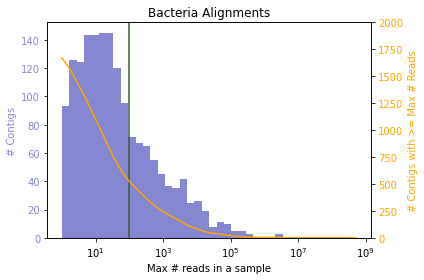

In [5]:
max_abundance_df_bacteria = bacteria_aggregated_strain.sum()
hist, bins = np.histogram(max_abundance_df_bacteria, bins=40)
fig, ax1 = plt.subplots()
# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax1.hist(max_abundance_df_bacteria, bins=logbins, color='#8687d1')
ax1.set_xscale('log')

ax1.set_xlabel('Max # reads in a sample')
ax1.set_ylabel('# Contigs', color='#8687d1')
ax1.tick_params(axis='y', labelcolor='#8687d1')
ax1.set_xscale('log')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('# Contigs with >= Max # Reads', color='orange')  # we already handled the x-label with ax1
ax2.plot(logbins,[sum(max_abundance_df_bacteria>=n) for n in logbins], color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
#ax2.set_yscale('log')
ax1.set_xscale('log')
ax2.set_ylim(0,2000)
ax2.vlines(x=100, ymin=0, ymax=2000, color='#3b5c36')

plt.title('Bacteria Alignments')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('%s/max_reads_distribution_bacteria.png' % fig_dir, transparent=True, bbox_inches='tight', format='png', dpi=500)
plt.show()

In [6]:
sum(max_abundance_df_bacteria>=100)

525

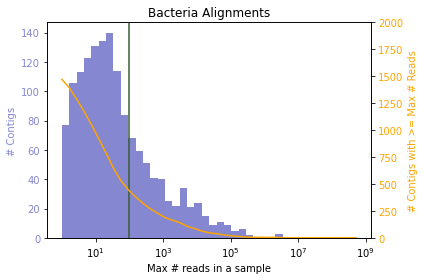

In [3]:
max_abundance_df_bacteria = bacteria_aggregated_species.sum()
hist, bins = np.histogram(max_abundance_df_bacteria, bins=40)
fig, ax1 = plt.subplots()
# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax1.hist(max_abundance_df_bacteria, bins=logbins, color='#8687d1')
ax1.set_xscale('log')

ax1.set_xlabel('Max # reads in a sample')
ax1.set_ylabel('# Contigs', color='#8687d1')
ax1.tick_params(axis='y', labelcolor='#8687d1')
ax1.set_xscale('log')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('# Contigs with >= Max # Reads', color='orange')  # we already handled the x-label with ax1
ax2.plot(logbins,[sum(max_abundance_df_bacteria>=n) for n in logbins], color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
#ax2.set_yscale('log')
ax1.set_xscale('log')
ax2.set_ylim(0,2000)
ax2.vlines(x=100, ymin=0, ymax=2000, color='#3b5c36')

plt.title('Bacteria Alignments')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('%s/max_reads_distribution_bacteria.png' % fig_dir, transparent=True, bbox_inches='tight', format='png', dpi=500)
plt.show()

In [9]:
np.shape(bacteria_aggregated_strain)

(4568, 1670)

In [9]:
bacteria_abundant = bacteria_aggregated_strain.columns[np.argsort(bacteria_aggregated_strain.sum())[::-1]][:50]
bacteria_prevalent = bacteria_aggregated_strain.columns[np.argsort((bacteria_aggregated_strain>0).sum())[::-1]][:50]
bacteria_passed_filter = bacteria_aggregated_strain.columns[(bacteria_aggregated_strain.sum()>100)]

print((set(bacteria_abundant).union(bacteria_prevalent)).difference(set(bacteria_passed_filter)))
print(len(set(bacteria_abundant).union(bacteria_prevalent)))
print(len(bacteria_passed_filter), 'bacteria that passed filter')
bacteria_aggregated_strain[bacteria_passed_filter].to_csv(bacteria_out_file)

set()
66
521 bacteria that passed filter


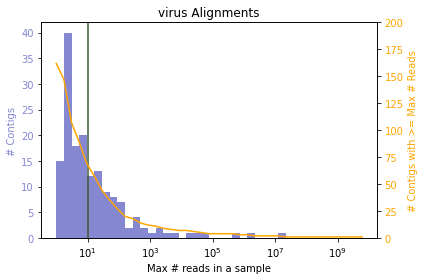

In [10]:
max_abundance_df_virus = virus_abundance_filtered.sum()
hist, bins = np.histogram(max_abundance_df_virus, bins=40)
fig, ax1 = plt.subplots()
# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax1.hist(max_abundance_df_virus, bins=logbins, color='#8687d1')
ax1.set_xscale('log')

ax1.set_xlabel('Max # reads in a sample')
ax1.set_ylabel('# Contigs', color='#8687d1')
ax1.tick_params(axis='y', labelcolor='#8687d1')
ax1.set_xscale('log')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('# Contigs with >= Max # Reads', color='orange')  # we already handled the x-label with ax1
ax2.plot(logbins,[sum(max_abundance_df_virus>=n) for n in logbins], color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
#ax2.set_yscale('log')
ax1.set_xscale('log')
ax2.set_ylim(0,200)
ax2.vlines(x=10, ymin=0, ymax=2000, color='#3b5c36')

plt.title('virus Alignments')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('%s/max_reads_distribution_virus.png' % fig_dir, transparent=True, bbox_inches='tight', format='png', dpi=500)
plt.show()

In [30]:
virus_transpose = virus_abundance_filtered.transpose()
virus_transpose['cleaned_names'] = [
    c.replace(',', '').split(' complete')[0].split(' segment')[0].split(
        ' isolate')[0].split(' DNA')[0].split(' variant')[0] for c in virus_abundance_filtered.columns]
virus_abundance_filtered = virus_transpose.groupby('cleaned_names').aggregate(sum).transpose()
virus_abundant = virus_abundance_filtered.columns[np.argsort(virus_abundance_filtered.sum())[::-1]][:50]
virus_prevalent = virus_abundance_filtered.columns[np.argsort((virus_abundance_filtered>0).sum())[::-1]][:50]
virus_passed_filter = virus_abundance_filtered.columns[(virus_abundance_filtered.sum()>10)]

print((set(virus_abundant).union(virus_prevalent)).difference(set(virus_passed_filter)))
print(len(set(virus_abundant).union(virus_prevalent)))
print(len(virus_passed_filter), 'virus that passed filter')
virus_abundance_filtered[virus_passed_filter].to_csv(virus_out_file)

{'Streptococcus phage DT1'}
59
65 virus that passed filter
